In [4]:
import gc
import joblib
import warnings
import pandas as pd
import numpy as np
from tqdm import tqdm
from scipy import stats
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [5]:
warnings.filterwarnings('ignore')

iris = load_iris()
target_names = {0:'setosa',
                1:'versicolor',
                2:'virginica'}

X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width',
                                     'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['Species'])


df = pd.concat([X, y], axis=1)

# [Assignment 1] Select features and categories for practice

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


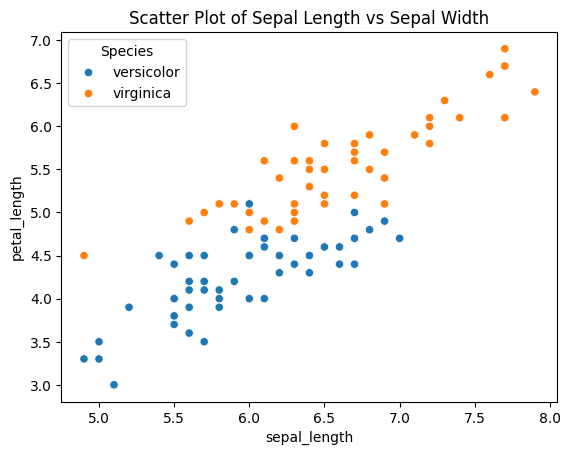

In [8]:
# Scatter plots
df['Species'] = df['Species'].map(target_names)
df = df.loc[df['Species'].isin(['versicolor', 'virginica']), ['sepal_length',
                                                              'petal_length',
                                                              'Species']]
df = df.reset_index(drop=True)

sns.scatterplot(x='sepal_length', y='petal_length', hue='Species', data=df)
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.show()

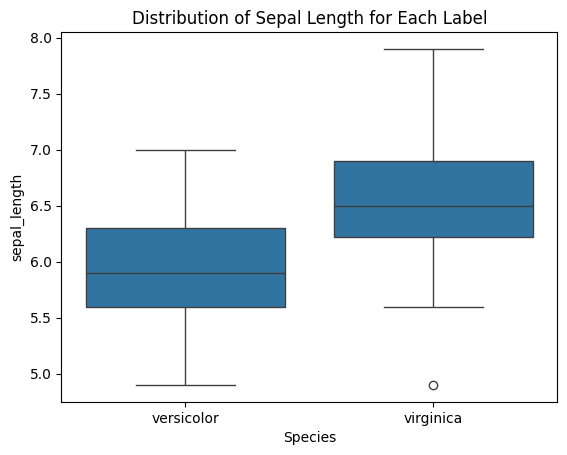

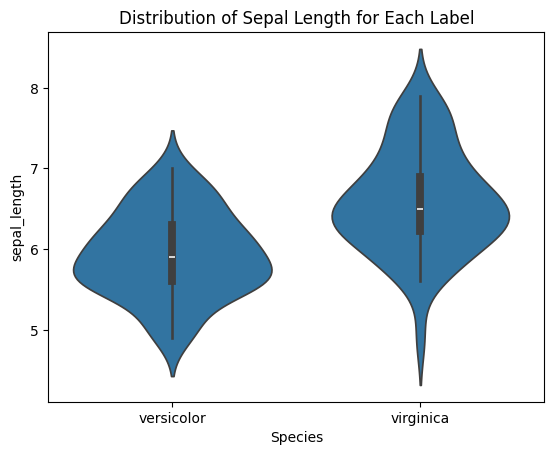

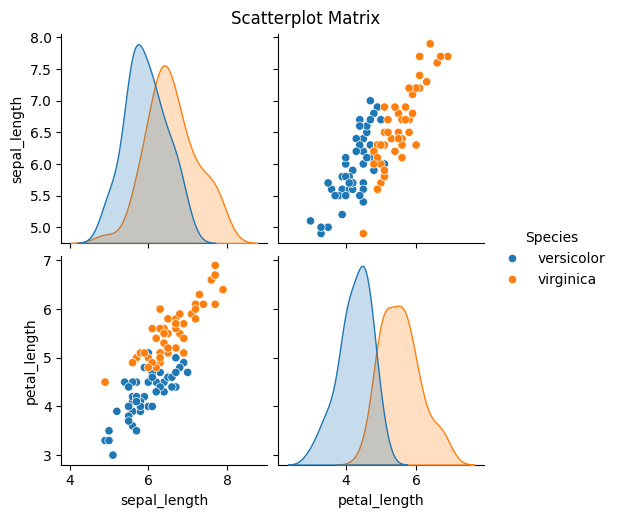

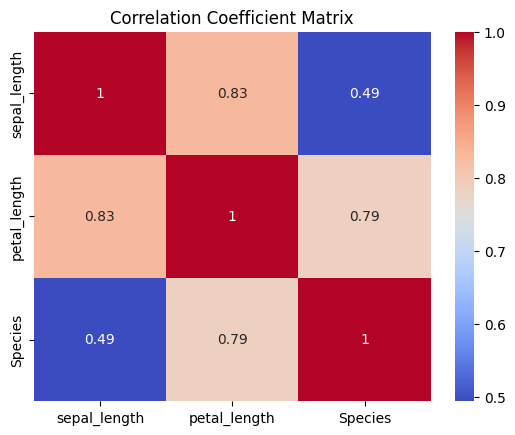

In [9]:
# Box plot
sns.boxplot(x='Species', y='sepal_length', data=df)
plt.title('Distribution of Sepal Length for Each Label')
plt.show()

# Violin plot
sns.violinplot(x='Species', y='sepal_length', data=df)
plt.title('Distribution of Sepal Length for Each Label')
plt.show()


sns.pairplot(df, hue='Species')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

# Correlation coefficient matrix
target_names = {'versicolor':0,
                'virginica':1}
df['Species'] = df['Species'].map(target_names)
correlation_matrix = df.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Coefficient Matrix')
plt.show()

# [Problem 3] Division of preprocessing/training data and verification data

In [10]:
train_X, test_X, train_Y, test_y = train_test_split(df[['sepal_length', 'petal_length']], df['Species'], test_size=0.25,
                                                     shuffle=True, random_state=42)

print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {}"
      "\n".format(train_X, test_X, train_Y, test_y))

Train data: 
 x =     sepal_length  petal_length
15           6.7           4.4
40           5.5           4.4
96           6.3           5.0
9            5.2           3.9
72           7.7           6.7
..           ...           ...
60           6.5           5.1
71           5.6           4.9
14           5.6           3.6
92           5.8           5.1
51           5.8           5.1

[75 rows x 2 columns] 
 y =     sepal_length  petal_length
83           6.3           5.1
53           6.3           5.6
70           6.9           5.7
45           5.7           4.2
44           5.6           4.2
39           5.5           4.0
22           6.3           4.9
80           7.4           6.1
10           5.0           3.5
0            7.0           4.7
18           6.2           4.5
30           5.5           3.8
73           6.3           4.9
33           6.0           5.1
90           6.7           5.6
4            6.5           4.6
76           6.2           4.8
77           6.1       

# [Problem 4] Pretreatment/Standardization

In [11]:
scaler = StandardScaler()
scaler.fit(train_X)
x_train_scaled = scaler.transform(train_X)
x_test_scaled = scaler.transform(test_X)

# [Problem 5] Learning and estimation

In [12]:
def accuracy(predicted, true):
    count = 0
    n = len(predicted)
    for i in range(n):
        if (predicted[i] != true[i]):
            count+=1
    return 1-(count/n)

def Kneighbors(data, label, test, n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(data, label.values.ravel())
    predicted = neigh.predict(test)
    true = test_y.values

    print("Predicted labels: {}".format(predicted))
    print("True labels: {}".format(true))
    print("Accuracy {}-nn: {:4f}".format(n, accuracy(predicted, true)))

Kneighbors(x_train_scaled, train_Y, x_test_scaled, 20)
Kneighbors(x_train_scaled, train_Y, x_test_scaled, 5)
Kneighbors(x_train_scaled, train_Y, x_test_scaled, 3)

Predicted labels: [1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1]
True labels: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
Accuracy 20-nn: 0.840000
Predicted labels: [1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1]
True labels: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
Accuracy 5-nn: 0.800000
Predicted labels: [1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1]
True labels: [1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1]
Accuracy 3-nn: 0.800000


# [Problem 6] Evaluation

In [13]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train_scaled, train_Y.values.ravel())
predicted = neigh.predict(x_test_scaled)

print('Accuracy:', accuracy_score(test_y, predicted))
print('Precision:', precision_score(test_y, predicted))
print('Recall:', recall_score(test_y, predicted))
print('F1 score:', f1_score(test_y, predicted))
print('Confusion matrix:', confusion_matrix(test_y, predicted))

Accuracy: 0.84
Precision: 0.8888888888888888
Recall: 0.7272727272727273
F1 score: 0.8
Confusion matrix: [[13  1]
 [ 3  8]]


# [Problem 7] Visualization

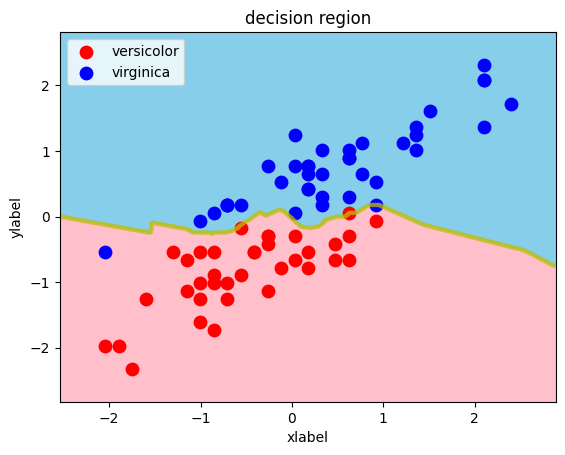

In [14]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):

    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

#knn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, train_Y.values.ravel())
neigh_predicted = neigh.predict(x_test_scaled)
decision_region(x_train_scaled, train_Y.values.ravel(), neigh)

# [Problem 8] Learning by other methods

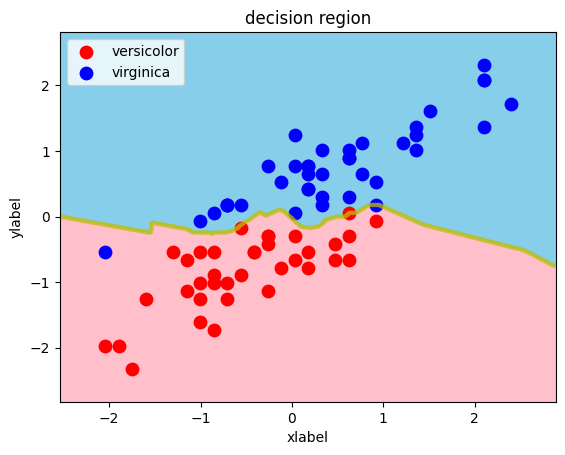

Accuracy of standardized Kneighbor: 0.8


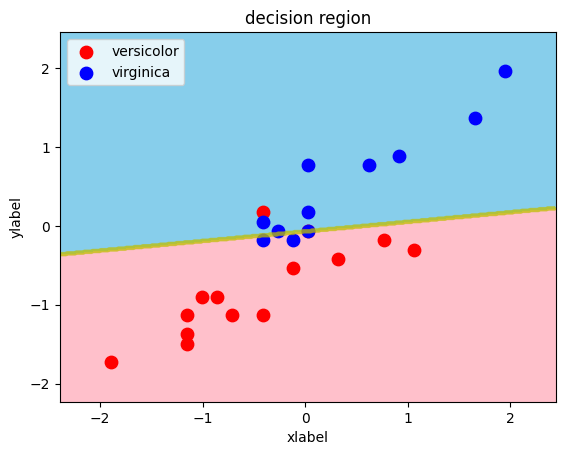

Accuracy of standardized Logistics Regression: 0.84


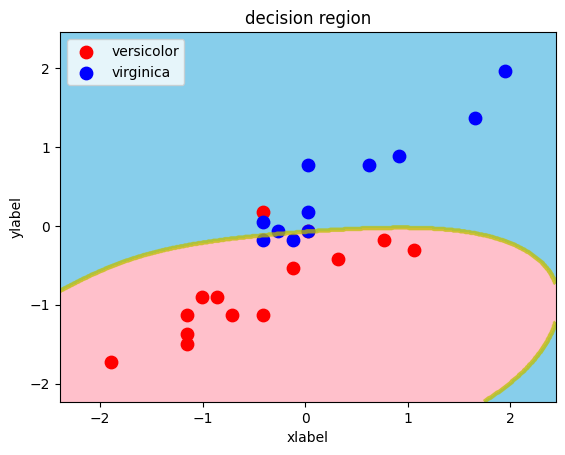

Accuracy of standardized SVM: 0.84
Cross val score: [0.875      1.         0.875      0.75       1.         1.
 1.         1.         1.         0.85714286]


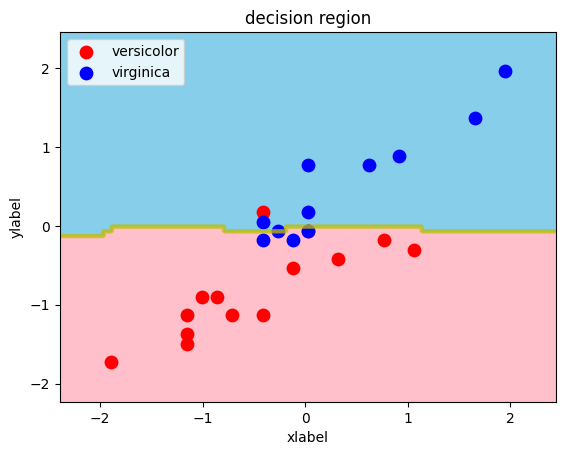

Accuracy of standardized Random Forest: 0.8


In [15]:
#knn
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, train_Y.values.ravel())
neigh_predicted = neigh.predict(x_test_scaled)
decision_region(x_train_scaled, train_Y.values.ravel(), neigh)
print("Accuracy of standardized Kneighbor: {}".format(accuracy_score(test_y, neigh_predicted)))



#logistic
logistics = LogisticRegression(random_state=0).fit(x_train_scaled, train_Y.values.ravel())
logistics_predicted = logistics.predict(x_test_scaled)
decision_region(x_test_scaled, test_y.values.ravel(), logistics)
print("Accuracy of standardized Logistics Regression: {}".format(accuracy_score(test_y, logistics_predicted)))

##svm
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_model = clf.fit(x_train_scaled, train_Y.values.ravel())
svc_predicted = svc_model.predict(x_test_scaled)
decision_region(x_test_scaled, test_y.values.ravel(), svc_model)
print("Accuracy of standardized SVM: {}".format(accuracy_score(test_y, svc_predicted)))

#Decision Tree
clf = DecisionTreeClassifier(random_state=0)
decision_tree_predict = cross_val_score(clf, x_train_scaled, train_Y.values.ravel(), cv=10)
print('Cross val score:', decision_tree_predict)

#Random Forest
clf = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_model = clf.fit(x_train_scaled, train_Y.values.ravel())
random_forest_predicted = random_forest_model.predict(x_test_scaled)
decision_region(x_test_scaled, test_y.values.ravel(), random_forest_model)

print("Accuracy of standardized Random Forest: {}".format(accuracy_score(test_y,
                                                                         random_forest_predicted)))
##merge
name = ["Kneighbor", "LogisticsRegression", "SVC", "RandomForest"]
predicts = [neigh_predicted, logistics_predicted, svc_predicted, random_forest_predicted]

test_standart = []
for i in range(len(name)):
    test_standart.append(predicts[i])

# [Problem 9] (Advanced task) Comparison with and without standardization

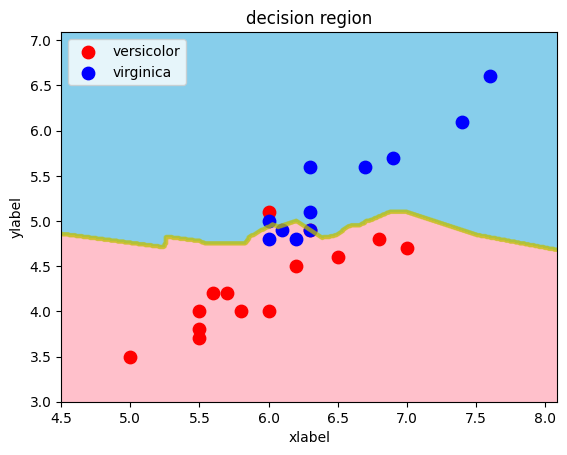

Accuracy of non-standardized Kneighbor: 0.8


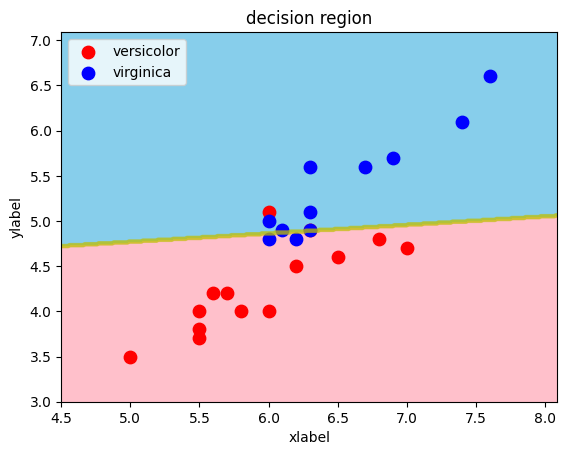

Accuracy of non-standardized Logistics Regression: 0.84


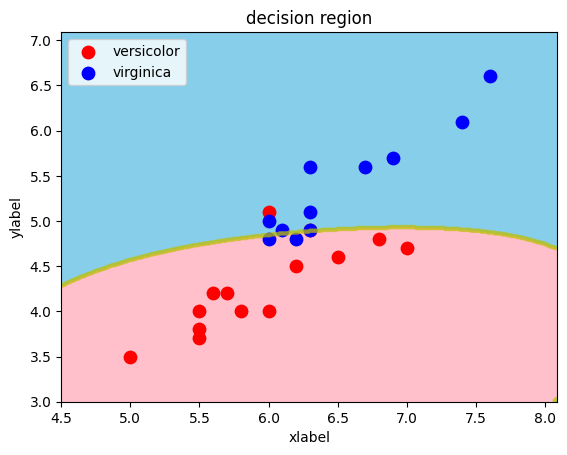

Accuracy of non-standardized SVC 0.84


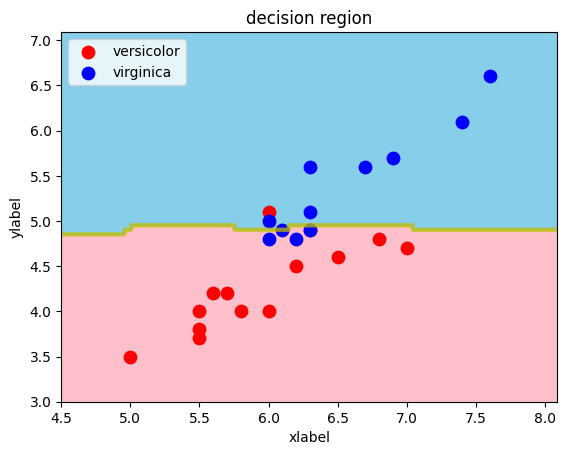

Accuracy of non-standardized Random Forest: 0.8
Standartized Kneighbor accuracy: 0.8
Not Kneighbor accuracy: 0.8
Standartized LogisticsRegression accuracy: 0.84
Not LogisticsRegression accuracy: 0.84
Standartized SVC accuracy: 0.84
Not SVC accuracy: 0.84
Standartized RandomForest accuracy: 0.8
Not RandomForest accuracy: 0.8


In [16]:
train_X, test_X, train_Y, test_y = train_test_split(df[['sepal_length', 'petal_length']], df['Species'], test_size=0.25,
                                                     shuffle=True, random_state=42)
## knn
new_neigh = KNeighborsClassifier(n_neighbors=3)
new_neigh.fit(train_X.values, train_Y.values.ravel())
new_neigh_predicted = new_neigh.predict(test_X.values)
decision_region(test_X.values, test_y.values.ravel(), new_neigh)

print("Accuracy of non-standardized Kneighbor: {}".format(accuracy_score(test_y, new_neigh_predicted)))

#logistic
new_logistics = LogisticRegression(random_state=0).fit(train_X.values, train_Y.values.ravel())
new_logistics_predicted = new_logistics.predict(test_X.values)
decision_region(test_X.values, test_y.values.ravel(), new_logistics)
print("Accuracy of non-standardized Logistics Regression: {}".format(accuracy_score(test_y, new_logistics_predicted)))

## SVM
new_svc_model = SVC().fit(train_X.values, train_Y.values)
new_svc_predicted = new_svc_model.predict(test_X.values)
decision_region(test_X.values, test_y.values, new_svc_model)
print("Accuracy of non-standardized SVC {}".format(accuracy_score(test_y, new_svc_predicted)))

## Random forest
new_clf = RandomForestClassifier(max_depth=2, random_state=0)
new_random_forest_model = new_clf.fit(train_X.values, train_Y.values.ravel())
new_random_forest_predicted = new_random_forest_model.predict(test_X.values)
decision_region(test_X.values, test_y.values.ravel(), new_random_forest_model)
print("Accuracy of non-standardized Random Forest: {}".format(accuracy_score(test_y,
                                                                             new_random_forest_predicted)))

new_name = ["Kneighbor", "LogisticsRegression", "SVC", "RandomForest"]
new_predicts = [new_neigh_predicted, new_logistics_predicted, new_svc_predicted, new_random_forest_predicted]

test_y_no_stand = []
for i in range(len(new_name)):
    test_y_no_stand.append(new_predicts[i])

for name, pred_stand, pred_no_stand in zip(new_name,
                                           test_standart,
                                           test_y_no_stand):
    print(f'Standartized {name} accuracy:', accuracy(pred_stand, test_y.values))
    print(f'Not {name} accuracy:', accuracy(pred_no_stand, test_y.values))

# [Problem 10] Multi-classes

In [17]:
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width',
                                     'petal_length', 'petal_width'])
y = pd.DataFrame(iris.target, columns=['Species'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train.values)
neigh_predicted = neigh.predict(x_test_scaled)
print("Accuracy of standardized KNeighbor: {}".format(accuracy_score(y_test, neigh_predicted)))

## logistic regression
new_logistics = LogisticRegression(random_state=0).fit(x_train_scaled, y_train.values.ravel())
new_logistics_predicted = new_logistics.predict(x_test_scaled)

print("Accuracy of standardized Logistic Regression: {}".format(accuracy_score(y_test, new_logistics_predicted)))

#SVM
new_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
new_svc_model = new_clf.fit(x_train_scaled, y_train.values.ravel())
new_svc_predicted = new_svc_model.predict(x_test_scaled)
print("Accuracy of standardized SVC: {}".format(accuracy_score(y_test, new_svc_predicted)))

## Random Forest
new_clf = RandomForestClassifier(max_depth=2, random_state=0)
new_random_forest_model = new_clf.fit(x_train_scaled, y_train.values.ravel())
new_random_forest_predicted = new_random_forest_model.predict(x_test_scaled)
print("Accuracy of standardized Random Forest: {}".format(accuracy_score(y_test, new_random_forest_predicted)))

Accuracy of standardized KNeighbor: 1.0
Accuracy of standardized Logistic Regression: 1.0
Accuracy of standardized SVC: 1.0
Accuracy of standardized Random Forest: 1.0
